In [30]:
import sklearn.cross_validation
import sklearn.datasets
import sklearn.metrics
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from hpsklearn import estimator, components
from hyperopt import tpe
import fonctions_auxiliaires as aux
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
warnings.filterwarnings("ignore")

In [3]:
X_train = pd.read_csv('adult_train.csv',delimiter=',',header = None)
X_test = pd.read_csv('adult_test.csv',delimiter=',',header = None)

del X_train[3] #Bijection with '4'
del X_test[3]


In [4]:
temp = list(X_test[14])
for i , el in enumerate(temp) :

    temp[i] = el.replace('.','')
        
X_test[14] = temp

In [5]:
le1 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()
le13 = LabelEncoder()
le14 = LabelEncoder()

LabelEncoders = [le1, le5, le6 , le7 , le8 , le9 , le13 , le14]
categorial_features = [1,5,6,7,8,9,13,14]


for i , j in enumerate(categorial_features) : 
    
    LabelEncoders[i].fit(X_train[j])
    X_train[j] =  LabelEncoders[i].transform(X_train[j])
    X_test[j] =  LabelEncoders[i].transform(X_test[j])
    
    
y_train = X_train[14]
del X_train[14]

y_test = X_test[14]
del X_test[14]

In [6]:
estim = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout=300, \
                                     fit_increment = 1, fit_increment_dump_filename= 'Logfile')

In [8]:
predictions, accuracies = aux.fit_intermediate(estim, np.ascontiguousarray(X_train), y_train, X_test, y_test)

Trial 1 loss: 0.17764471057884235
Trial 2 loss: 0.1738062336864732
Trial 3 loss: 0.17319207738369413
Trial 4 loss: 0.2456625211116229
Trial 5 loss: 0.20251804084139413
Trial 6 loss: 0.3067710732381391
Trial 7 loss: 0.23660371564563176
Trial 8 loss: 0.193459235375403
Trial 9 loss: 0.1457085828343313
Trial 10 loss: 0.23660371564563176
Test accuracy: 0.843867084331
Predict: [0 0 1 ..., 1 0 1]
Best Model: {'preprocs': (MinMaxScaler(copy=True, feature_range=(-1.0, 1.0)),), 'learner': RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None,
            max_features=0.11572217905314164, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2012, n_jobs=1,
            oob_score=False, random_state=3, verbose=False,
            warm_start=False), 'ex_preprocs': ()}
====End of demo====


In [9]:
predictions

[array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 1, ..., 1, 0, 1]),
 array([0, 0, 0, ..., 1, 0, 1]),
 array([0, 0, 0, ..., 1, 0, 1]),
 array([0, 0, 0, ..., 1, 0, 1]),
 array([0, 0, 0, ..., 1, 0, 1]),
 array([0, 0, 0, ..., 1, 0, 1]),
 array([0, 0, 0, ..., 1, 0, 1]),
 array([0, 0, 1, ..., 1, 0, 1]),
 array([0, 0, 1, ..., 1, 0, 1])]

In [12]:
metrics_iter = []
for i in range(0, len(predictions)-1):
    y = predictions[i]
    metrics_iter.append(aux.metrics(estim, X_train, y_train, X_test, y_test, y))


In [13]:
metrics_iter

[(0.99996928841251809,
  0.84386708433142932,
  0.93856051467631685,
  0.81603971472521331,
  0.87302240341100357),
 (0.99996928841251809,
  0.84386708433142932,
  0.90341777241656618,
  0.87125794943384516,
  0.88704646847487079),
 (0.99996928841251809,
  0.84386708433142932,
  0.98150381986328905,
  0.83299208299208294,
  0.90117030309742674),
 (0.99996928841251809,
  0.84386708433142932,
  0.98150381986328905,
  0.83299208299208294,
  0.90117030309742674),
 (0.99996928841251809,
  0.84386708433142932,
  0.98150381986328905,
  0.83299208299208294,
  0.90117030309742674),
 (0.99996928841251809,
  0.84386708433142932,
  0.98150381986328905,
  0.83299208299208294,
  0.90117030309742674),
 (0.99996928841251809,
  0.84386708433142932,
  0.98150381986328905,
  0.83299208299208294,
  0.90117030309742674),
 (0.99996928841251809,
  0.84386708433142932,
  0.98150381986328905,
  0.83299208299208294,
  0.90117030309742674),
 (0.99996928841251809,
  0.84386708433142932,
  0.92360273421793326,
  0

### General results

In [14]:
estim.fit(np.ascontiguousarray(X_train), y_train)

In [15]:
estim.best_model()

{'ex_preprocs': (),
 'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='log2', max_leaf_nodes=None,
             min_samples_leaf=7, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=1,
             oob_score=False, random_state=4, verbose=False,
             warm_start=False),
 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),)}

In [16]:
y = estim.predict(X_test)
y

array([0, 0, 0, ..., 1, 0, 1])

In [17]:
metrics_adult = aux.metrics(estim, X_train, y_train, X_test, y_test, y)

In [18]:
metrics_adult

(0.88940757347747301,
 0.86210920705116389,
 0.94250100522718139,
 0.88452830188679243,
 0.91259489974693397)

In [19]:
aux.time_retriever(estim)

{0: 1482223619.0,
 1: 1482223631.0,
 2: 1482223635.0,
 3: 1482223709.0,
 4: 1482223714.0,
 5: 1482224015.0,
 6: 1482224020.0,
 7: 1482224023.0,
 8: 1482224056.0,
 9: 1482224086.0}

In [20]:
classifiers = estim.trials.trials[2]['misc']['vals']

In [37]:
list_clfnum = [0,1,2,3,4,5,6]
list_clf =['svc', 'knn', 'random_forest', 'extra_trees', 'ada_boost', 'gradient_boosting', 'sgd']
dict_clf = dict(zip(list_clfnum, list_clf))
#new_list = estim.trials.vals['preprocessing'].map(lambda x: list_clf[x])
dict_clf[4]

'ada_boost'

In [38]:
clf = estim.trials.vals['clf']
clf = ['ada_boost', 'random_forest', 'extra_trees', 'random_forest', 'svc', 'ada_boost', 'extra_trees', 'gradient_boosting',\
      'random_forest', 'knn']

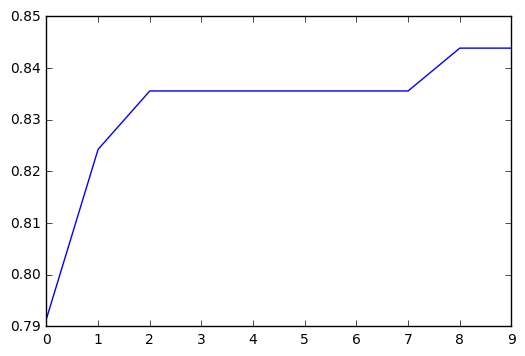

In [41]:
plt.plot(accuracies)
plt.show()

In [42]:
estim.trials.trials

[{'book_time': datetime.datetime(2016, 12, 20, 9, 46, 59, 505000),
  'exp_key': None,
  'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'idxs': {'clf': [0],
    'clf.ada_boost.ada_boost_algo': [0],
    'clf.ada_boost.ada_boost_learning_rate': [0],
    'clf.ada_boost.ada_boost_n_estimators': [0],
    'clf.ada_boost.ada_boost_rstate': [0],
    'clf.extra_trees.etc_bootstrap': [],
    'clf.extra_trees.etc_criterion': [],
    'clf.extra_trees.etc_max_depth': [],
    'clf.extra_trees.etc_max_features': [],
    'clf.extra_trees.etc_max_features.frac': [],
    'clf.extra_trees.etc_min_samples_leaf': [],
    'clf.extra_trees.etc_min_samples_leaf.gt1': [],
    'clf.extra_trees.etc_n_estimators': [],
    'clf.extra_trees.etc_rstate': [],
    'clf.grad_boosting.gradient_boosting_learning_rate': [],
    'clf.grad_boosting.gradient_boosting_max_depth': [],
    'clf.grad_boosting.gradient_boosting_max_features': [],
    'clf.grad_boosting.gradient_boosting_max_features.frac': [],
    'c

In [ ]:
number_diff =0
for i in range(0,len(y)):
    if y[i] != y_bis[i]:
        number_diff = number_diff +1
print(number_diff)